# Time Series using Pandas - Example 

### Juan Flores - Jan 2021

#### Importing Libraries

In [96]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
import matplotlib.dates as mdates

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Date format example

In [3]:
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [4]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

In [6]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

In [7]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [8]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

#### Reading from file
##### index_col indicates Pandas that the date column is the time index

In [26]:
opsd_daily = pd.read_csv('Data/opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily.shape

(4383, 4)

In [27]:
opsd_daily.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [28]:
opsd_daily.tail(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [29]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Name: 2017-08-10 00:00:00, dtype: float64

#### Plot the Time Series

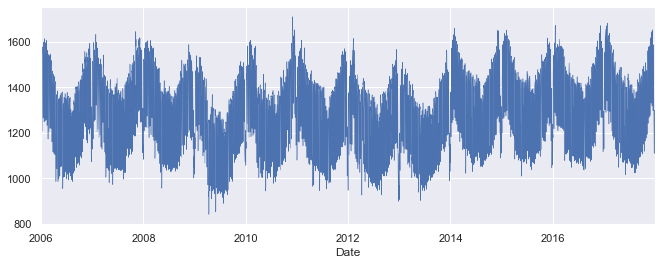

In [30]:
opsd_daily['Consumption'].plot(linewidth=0.5);

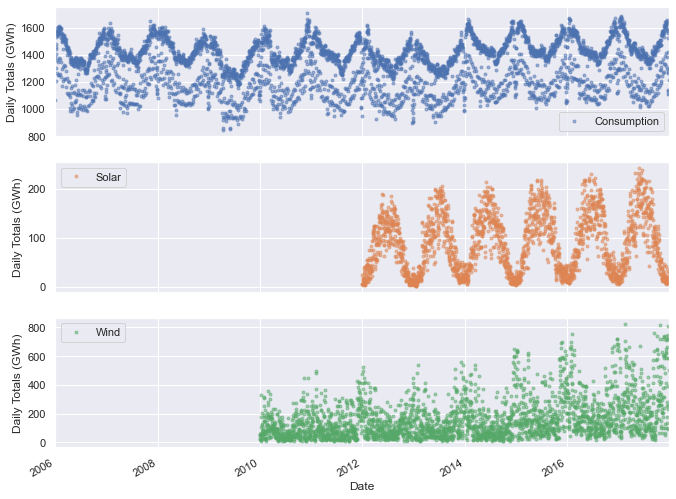

In [31]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

##### Plotting selectively

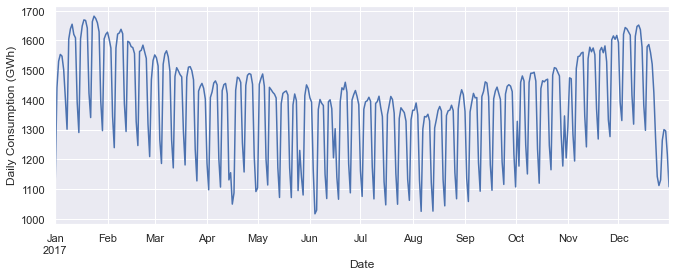

In [32]:
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

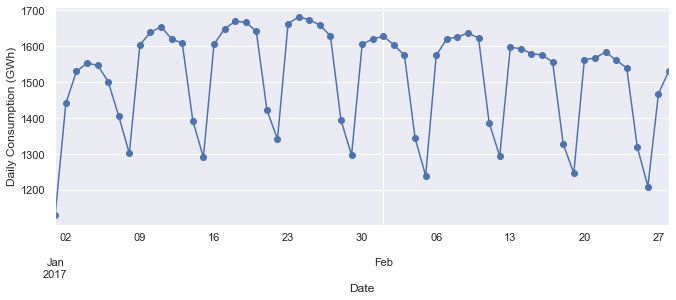

In [33]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

##### Intertick weekly ticks helps detect weekly cycles (seasonality)

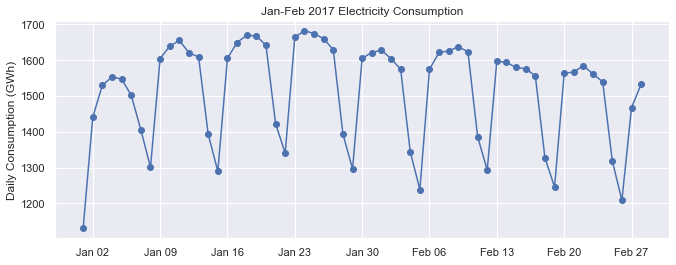

In [35]:
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [56]:
opsd_daily.head(4)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN


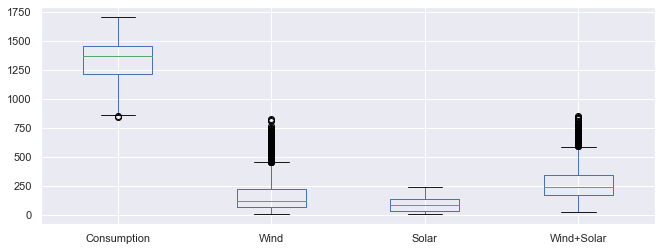

In [68]:
opsd_daily.plot.box()
plt.show()

##### Rolling means

In [51]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


##### Plotting original data and rolling means

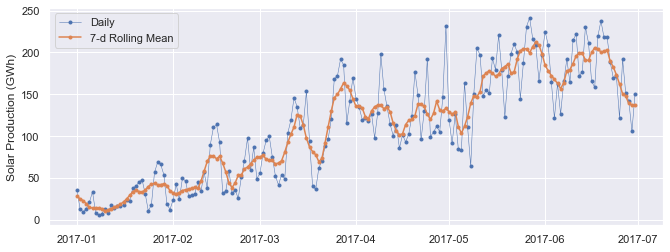

In [53]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

##### We can see trend as a yearly rolling mean

In [58]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

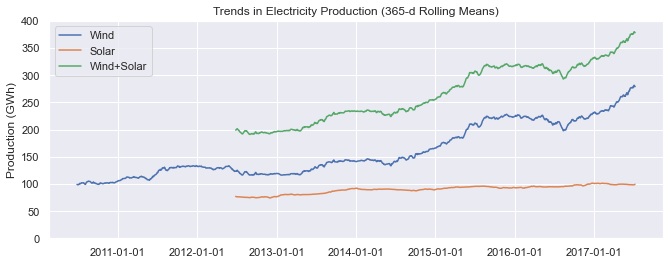

In [61]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for ts in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[ts], label=ts)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');

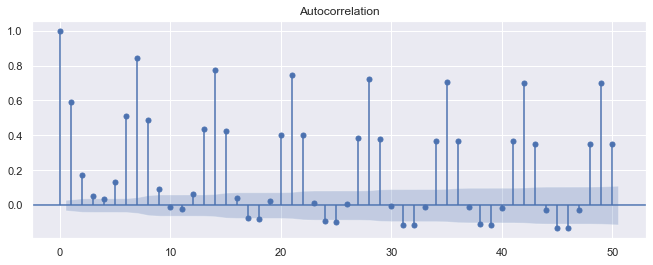

In [97]:
plot_acf(opsd_daily['Consumption'], lags=50)
plt.show()

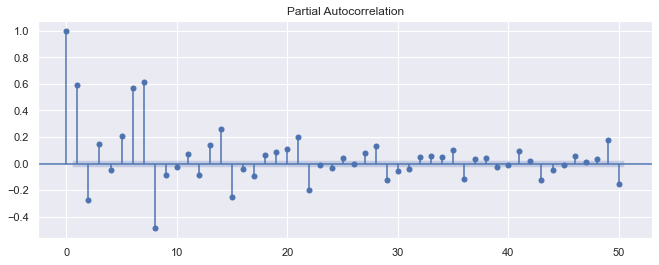

In [95]:
plot_pacf(opsd_daily['Consumption'], lags=50)
plt.show()

/Users/juan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/juan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/juan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/juan/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                 4383
Model:                 ARIMA(5, 0, 5)   Log Likelihood              -25715.847
Date:                Mon, 18 Jan 2021   AIC                          51455.693
Time:                        07:55:09   BIC                          51532.319
Sample:                    01-01-2006   HQIC                         51482.729
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1338.6758   3095.947      0.432      0.665   -4729.270    7406.621
ar.L1          1.8033      0.004    450.784      0.000       1.795       1.811
ar.L2         -2.2433      0.009   -252.625      0.0

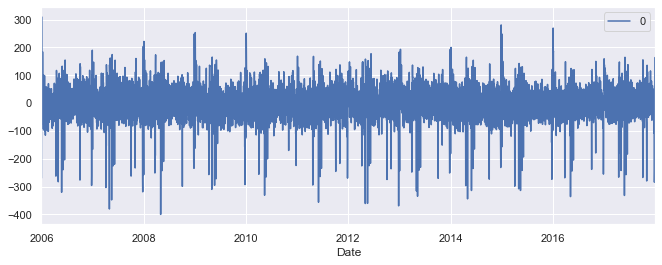

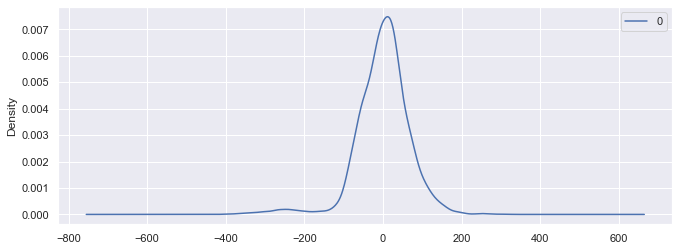

                 0
count  4383.000000
mean      0.039966
std      68.747898
min    -399.955004
25%     -34.388068
50%       3.865691
75%      37.403293
max     309.984429


In [98]:
# fit model
model = ARIMA(opsd_daily['Consumption'], order=(5,0,5))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())